In [1]:
# Importing necessary libraries 
import os
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
# Setup working directory
os.getcwd()
os.chdir('C:\Users\neelk\Documents\UTD\HW2')

In [13]:
# Redaing the dataset
store = pd.read_csv('transactions.csv')
store

,Transaction,Product
0,12359,Candy Bar
1,12362,Pain Reliever
2,12362,Pain Reliever
3,12365,Toothpaste
4,12371,Bow
...,...,...
459253,1221863,Candy Bar
459254,1221863,Greeting Cards
459255,1221863,Toothpaste
459256,1221863,Toothpaste


## Data Preprocessing and Exploration

In [34]:
# Cross-tabulate the Transaction and Product data to create a matrix indicating whether a product was purchased in each transaction

store_df = pd.crosstab(store.Transaction, store.Product).astype(bool)

print(store_df.head(10)) # Print the first 10 rows of the cross-tabulated data

# Generate descriptive statistics of the cross-tabulated data
store_df.describe()


Product        Bow  Candy Bar  Deodorant  Greeting Cards  Magazine  Markers  \
Transaction                                                                   
12359        False       True      False           False     False    False   
12362        False      False      False           False     False    False   
12365        False      False      False           False     False    False   
12371         True      False      False           False     False    False   
12380        False      False      False            True     False    False   
12383        False      False      False           False     False    False   
12386        False      False      False           False     False    False   
12392        False      False      False           False      True    False   
12401        False       True      False           False      True    False   
12404        False       True      False           False     False    False   

Product      Pain Reliever  Pencils   Pens  Perfume

Product,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,189071,165799,198916,170623,151739,198386,194660,173015,171285,182008,188304,197099,193240,191395,186530,167915,189802


## Identify the frequent itemsets using a minimum support threshold of 1%

In [71]:
# identify frequent itemsets 
# min_support: support threshold

freqi = apriori(store_df, min_support = 0.01, use_colnames = True)
freqi

,support,itemsets
0,0.054645,(Bow)
1,0.171005,(Candy Bar)
2,0.146885,(Greeting Cards)
3,0.241305,(Magazine)
4,0.026700,(Pain Reliever)
5,0.134925,(Pencils)
6,0.143575,(Pens)
7,0.089960,(Perfume)
8,0.058480,(Photo Processing)
9,0.014505,(Prescription Med)


- There are 40 itemsets that are frequent using a minimum support threshold of 1%.

- The most frequent item is magazine, which has the highest support value of 0.2413.


## Identifying all association rules with a minimum confidence of 10%.

In [17]:
# identify association rules 
# metric: metric to use for mining (confidence or lift currently available) 
# min_threshold: minimum threshold for selected metric we will use confidence as the metric, with a minimum threshold of 10% (0.10)

rules = association_rules(freqi, metric="confidence", min_threshold=0.1)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
1,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
2,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604
3,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626
4,(Candy Bar),(Magazine),0.171005,0.241305,0.040535,0.237040,0.982325,-0.000729,0.994410
5,(Magazine),(Candy Bar),0.241305,0.171005,0.040535,0.167982,0.982325,-0.000729,0.996367
6,(Candy Bar),(Pencils),0.171005,0.134925,0.033015,0.193065,1.430903,0.009942,1.072050
7,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338


- There are 50 rules generated with a minimum confidence of 10%.

- Among those rules, Rule (Pencils, Toothpaste) --> (Canday Bar) has the highest confidence value, which is 0.4638.


In [74]:
rules2 = rules.sort_values(['support'], ascending =[False])
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604
3,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626
4,(Candy Bar),(Magazine),0.171005,0.241305,0.040535,0.237040,0.982325,-0.000729,0.994410
5,(Magazine),(Candy Bar),0.241305,0.171005,0.040535,0.167982,0.982325,-0.000729,0.996367
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087
11,(Greeting Cards),(Magazine),0.146885,0.241305,0.036335,0.247370,1.025136,0.000891,1.008059
10,(Magazine),(Greeting Cards),0.241305,0.146885,0.036335,0.150577,1.025136,0.000891,1.004347
6,(Candy Bar),(Pencils),0.171005,0.134925,0.033015,0.193065,1.430903,0.009942,1.072050
7,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558


## Lets find the rules that have the highest lift

In [18]:
# sort the rules, first by lift and then by confidence 

rules2 = rules.sort_values(['lift'], ascending =[False])
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
26,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172
1,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
0,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
28,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
31,(Greeting Cards),"(Candy Bar, Magazine)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
30,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
47,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810


- Based on the rule list sorted by lift above, rule (Perfume) --> (Toothbrush), in which (Perfume) is antecedent, (Toothbrush) is consequent, has the highest lift value, which is 3.6014. 

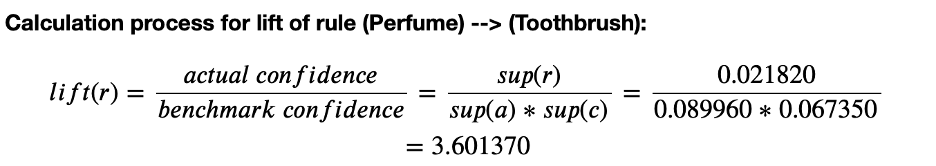

In [67]:
# Calculating lift

conf_r = 0.242552
sup_c = 0.067350

lift = conf_r/sup_c

lift

3.6013659985152193

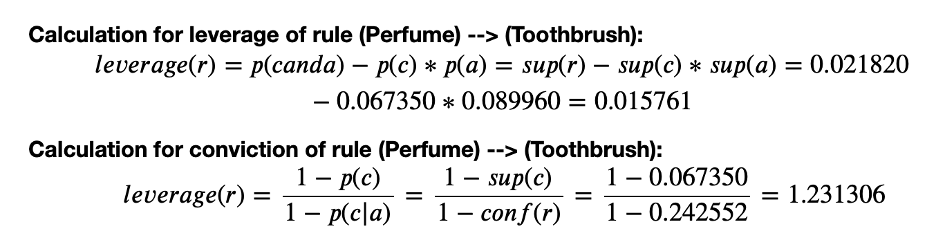

In [62]:
#Calculating Leverage

sup_r = 0.021820
sup_c = 0.067350
sup_a = 0.089960

leverage = sup_r - (sup_c * sup_a)
leverage




0.015761194

In [68]:
# Calculating Conviction

conf_r = 0.242552
sup_c = 0.067350

conviction = (1 - sup_c)/(1 - conf_r)

conviction


1.2313056473843749

## Interpreting and discussing the 5 rules with
- the highest confidence
- the highest lift
- the highest leverage
- the highest conviction.

In [33]:
# Sort the rules DataFrame based on the 'confidence' column in descending order
rules3 = rules.sort_values(['confidence'], ascending =[False])
rules3

# Add a new column 'antlen' to the DataFrame, representing the length of the antecedents in each rule
rules3["antlen"] = rules3["antecedents"].apply(lambda x: len(x))

# Add a new column 'conlen' to the DataFrame, representing the length of the consequents in each rule
rules3["conlen"] = rules3["consequents"].apply(lambda x: len(x))

# Display the first 10 rows of the sorted DataFrame
rules3.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen,conlen
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,2,1
30,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,2,1
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,2,1
28,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,2,1
34,"(Greeting Cards, Toothpaste)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726,2,1
29,"(Candy Bar, Greeting Cards)",(Magazine),0.043660,0.241305,0.016665,0.381699,1.581813,0.006130,1.227065,2,1
37,"(Magazine, Pencils)",(Candy Bar),0.031630,0.171005,0.012005,0.379545,2.219495,0.006596,1.336108,2,1
47,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873,2,1
46,"(Pencils, Greeting Cards)",(Magazine),0.029240,0.241305,0.010955,0.374658,1.552633,0.003899,1.213248,2,1
49,"(Greeting Cards, Toothpaste)",(Magazine),0.032080,0.241305,0.011945,0.372350,1.543069,0.004204,1.208787,2,1


#### - We are looking at the rules sorted by confidence.
#### - The rule at the top (Pencils, Toothpaste) ==>  (Candy Bar) # 
#### - If (Pencils, Toothpaste) is purchased then we can say with 46.37% confidence that (Candy Bar) is also purchased.
#### - This rule has lift ratio if 2.711.
#### - The lift ratio shows the efficieny of the rule in finding consequents as compared to selecting a random transaction.


In [29]:
# Sort the 'rules' DataFrame based on the 'lift' column in descending order
rules4 = rules.sort_values(['lift'], ascending=[False])

# Create a new column 'antlen' in the sorted DataFrame to store the length of each item in the 'antecedents' column
rules4["antlen"] = rules4["antecedents"].apply(lambda x: len(x))

# Create a new column 'conlen' in the sorted DataFrame to store the length of each item in the 'consequents' column
rules4["conlen"] = rules4["consequents"].apply(lambda x: len(x))

rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen,conlen
27,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306,1,1
26,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172,1,1
1,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877,1,1
0,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755,1,1
28,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,2,1
31,(Greeting Cards),"(Candy Bar, Magazine)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253,1,2
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,2,1
30,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,2,1
47,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873,2,1
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,2,1


#### - RULE 1 is {Perfume} --> {Toothbrush}, which means if perfume is purchased, toothbrush is purchased with 24.26% confidence. 
#### - This rule has a lift ratio of 3.60. 
#### - This combination appears in 2.18% of the baskets and the lift tells us that combination is 3.6x more likely to occur together than one would expect from the individual rates of incidence alone.

In [30]:
# Sort the 'rules' DataFrame based on the 'leverage' column in descending order
rules5 = rules.sort_values(['leverage'], ascending=[False])

# Create a new column 'antlen' in the 'rules5' DataFrame to store the length of each item in the 'antecedents' column
rules5["antlen"] = rules5["antecedents"].apply(lambda x: len(x))

# Create a new column 'conlen' in the 'rules5' DataFrame to store the length of each item in the 'consequents' column
rules5["conlen"] = rules5["consequents"].apply(lambda x: len(x))

# Display the resulting 'rules5' DataFrame
rules5


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen,conlen
2,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604,1,1
3,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626,1,1
26,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172,1,1
27,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306,1,1
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338,1,1
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087,1,1
31,(Greeting Cards),"(Candy Bar, Magazine)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253,1,2
28,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,2,1
30,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,2,1
7,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558,1,1


#### - RULE 1 is {Candy Bar} --> {Greeting Cards}, which means if candy bar is purchased, greeting cards are purchased with confidence 25.53%. 
#### - This rule has a lift ratio of 1.73. 
#### - This combination appears in 4.37% of the baskets and the lift tells us that combination is 1.7x more likely to occur together than one would expect from the individual rates of incidence alone.

In [31]:
rules6 = rules.sort_values(['conviction'], ascending =[False])
rules6

rules6["antlen"] = rules6["antecedents"].apply(lambda x: len(x))
rules6["conlen"] = rules6["consequents"].apply(lambda x: len(x))
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen,conlen
43,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,2,1
30,"(Magazine, Greeting Cards)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,2,1
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,2,1
28,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,2,1
34,"(Greeting Cards, Toothpaste)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726,2,1
47,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873,2,1
26,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172,1,1
37,"(Magazine, Pencils)",(Candy Bar),0.031630,0.171005,0.012005,0.379545,2.219495,0.006596,1.336108,2,1
44,"(Magazine, Pencils)",(Greeting Cards),0.031630,0.146885,0.010955,0.346348,2.357956,0.006309,1.305152,2,1
41,"(Candy Bar, Pencils)",(Toothpaste),0.033015,0.160425,0.011390,0.344995,2.150505,0.006094,1.281784,2,1


#### As for the top five rules based on highest conviction, we got totally same rule list as we got when we sorted the rules using confidence.

In [70]:
rules3 = rules[ (rules['conlen'] == 1) &
       (rules['confidence'] >= 0.2) &
       (rules['lift'] > 1.2) ]
rules3 = rules3.sort_values(['lift', 'confidence'], ascending =[False, False])
rules3
